# Mall Shopper Segmentation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(columns={"Annual Income (k$)":"income","Spending Score (1-100)":"score"},inplace=True)
df.head()

,CustomerID,Genre,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop(columns={"CustomerID","Genre","Age"},inplace=True)
df.head(2)

,income,score
0,15,39
1,15,81


<Axes: xlabel='income', ylabel='score'>

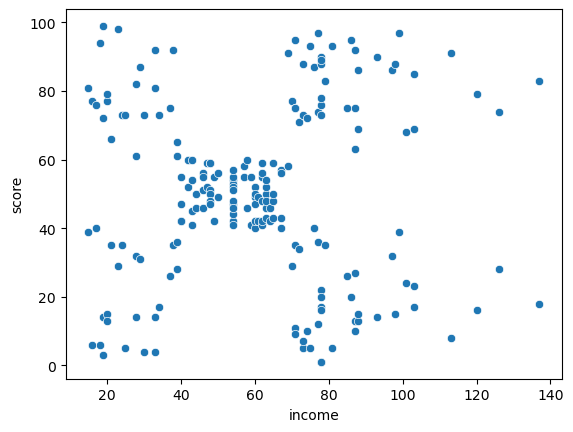

In [5]:
sns.scatterplot(x=df['income'],y=df['score'])

## K-Means Clustering

In [6]:
wcs=[]

for k in range(1,11):
    from sklearn.cluster import KMeans
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(df)
    wcs.append(kmeans.inertia_)
print(wcs)

[269981.28, 183257.8615446178, 106348.37306211119, 73679.78903948834, 66790.25561457992, 37455.98455516028, 35639.56032453859, 24990.4343103969, 22891.56972012597, 21265.28303218521]


Text(0, 0.5, 'WCSS')

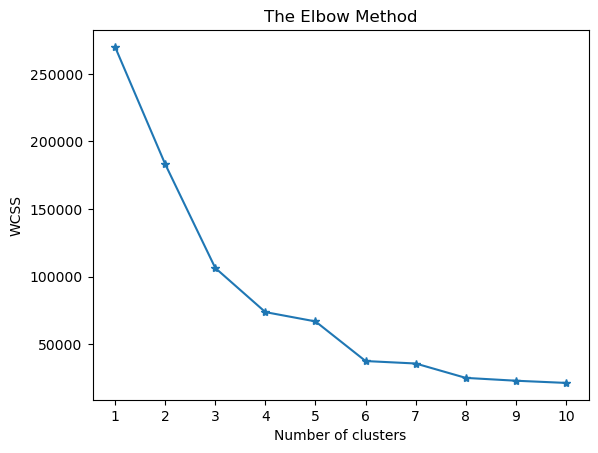

In [7]:
plt.plot(range(1,11),wcs,marker='*')
plt.xticks(range(1,11))
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [8]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
df['k_means_cluster']=kmeans.fit_predict(df)
df.head()

,income,score,k_means_cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


<Axes: xlabel='income', ylabel='score'>

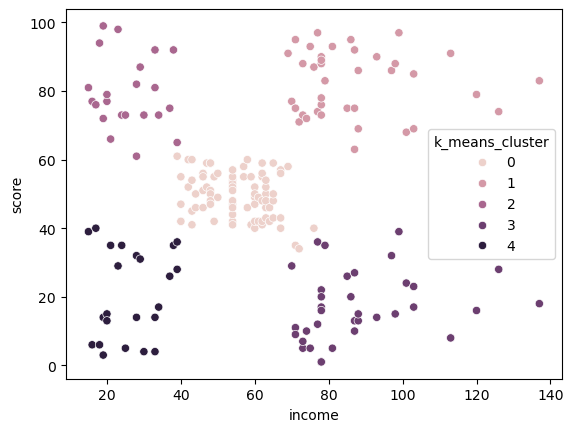

In [9]:
sns.scatterplot(x='income',y='score',hue='k_means_cluster',data=df)

In [10]:
cluster_labels = kmeans.labels_          #to extract data values of cluster no. 2

In [11]:
cluster_2=(cluster_labels==2)

In [12]:
df[cluster_2].head()

,income,score,k_means_cluster
1,15,81,2
3,16,77,2
5,17,76,2
7,18,94,2
9,19,72,2


## Agglomerative Clustering

In [13]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Eucledian Distances')

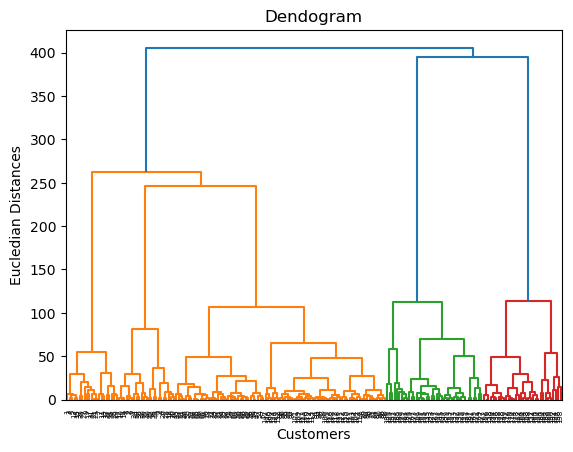

In [14]:
data=sch.linkage(df,method='ward')

dendrogram=sch.dendrogram(data)

plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Eucledian Distances')


In [15]:
from sklearn.cluster import AgglomerativeClustering

hc=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
df['h_cluster']= hc.fit_predict(df)


In [19]:
df.head()

,income,score,k_means_cluster,h_cluster
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4


<Axes: xlabel='income', ylabel='score'>

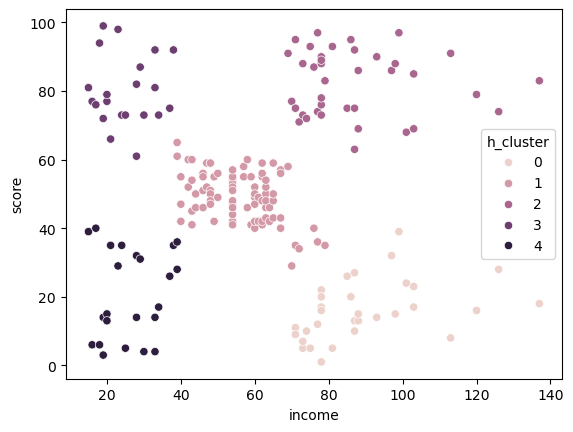

In [17]:
sns.scatterplot(x=df['income'],y=df['score'],hue=df['h_cluster'])

## DBSCAN 

In [26]:
for r in range (1,10):
    for m in range(3,10):
        from sklearn.cluster import DBSCAN
        dbs=DBSCAN(eps=r,min_samples=m)
        df['db_cluster']=dbs.fit_predict(df)
        
    if df['db_cluster'].nunique()==5:
         break

print('eps:- ',r)  # Eplison Value (Radius)->represents the maximum distance between two samples for them to be considered as neighbors.
print('min:- ',m)  # Minimum no. of data points within a specified radius (eplison) -> it must be min 3

eps:-  8
min:-  9


In [28]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=8,min_samples=9)
df['db_cluster']=dbs.fit_predict(df)
df.head()

,income,score,k_means_cluster,h_cluster,db_cluster
0,15,39,4,4,-1
1,15,81,2,3,-1
2,16,6,4,4,-1
3,16,77,2,3,-1
4,17,40,4,4,-1


<Axes: xlabel='income', ylabel='score'>

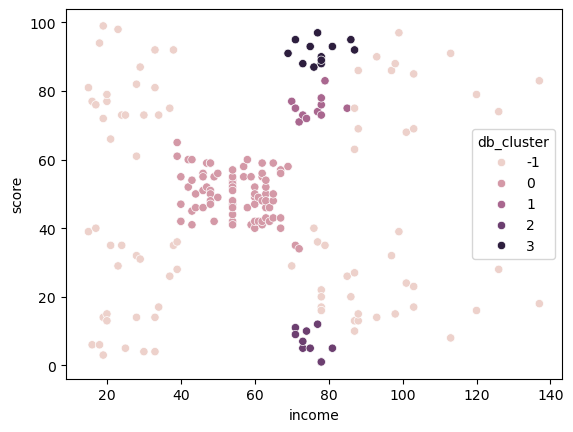

In [29]:
sns.scatterplot(x=df['income'],y=df['score'],hue=df['db_cluster'])